In [1]:
#CERES-EBAF Data - Code to read in data, plot timeseries of top of atmosphere radiation and energy balance along with 
#                   seasonal averages for the Arctic
#Jennifer Kay (Jennifer.E.Kay@colorado.edu University of Colorado) 
#Renato Barrera (renatobarrera56@gmail.com)
#Last updated: July 12, 2021

%matplotlib inline
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import xarray as xr
import scipy.stats as stats ## https://docs.scipy.org/doc/scipy/reference/stats.html

In [2]:
## Step 1: open the CERES-EBAF dataset using xarray
ds = xr.open_dataset("CERES_EBAF-TOA_Ed4.1_Subset_200003-202102.nc")
#ds   ## when you type "ds" - it prints information about the file to the screen.  

lat=ds["lat"]
lon=ds["lon"]
ds

<xarray.Dataset>
Dimensions:            (lat: 180, lon: 360, time: 252)
Coordinates:
  * lon                (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat                (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time               (time) datetime64[ns] 2000-03-15 ... 2021-02-15
Data variables:
    toa_sw_all_mon     (time, lat, lon) float32 ...
    toa_lw_all_mon     (time, lat, lon) float32 ...
    toa_net_all_mon    (time, lat, lon) float32 ...
    toa_sw_clr_c_mon   (time, lat, lon) float32 ...
    toa_lw_clr_c_mon   (time, lat, lon) float32 ...
    toa_net_clr_c_mon  (time, lat, lon) float32 ...
    solar_mon          (time, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

In [3]:
# Step 2: Defining variables
### Calculate top of atmosphere energy imbalance (NetSW+NetLW)

### Outgoing longwave radiation (OLR)
OLR=ds.toa_lw_all_mon
### Calculate absorbed shortwave radiation (ASR)
OSR=ds.toa_sw_all_mon ### outgoing solar radiation, measured by CERES
SOLIN=ds.solar_mon    ### incoming solar radiation, from the sun
ASR=SOLIN-OSR  ### sign convention, positive down.  incoming solar radiation minus outgoing solar radiation
netLW=-OLR                  ### Note that we are taking -OLR so that the sign convention is all positive down
netSW=ASR
netTOAimbalance=netSW+netLW ### sign convention positive down

In [4]:
# Step 3: Taking Arctic mean and creating monthly variable members for both the SW(ASR) and LW(OLR)
### *Note: Arctic is 70-90 North

### ASR
cos_lat=np.cos(lat*np.pi/180)
zmean=ASR.mean('lon')
cos_lat_arctic=cos_lat.sel(lat=slice(70,90))
#print(cos_lat_arctic.shape)
zmean_arctic=zmean.sel(lat=slice(70,90))
#print(zmean_arctic.shape)
am_ASR=(zmean_arctic*cos_lat_arctic).sum('lat')/np.nansum(cos_lat_arctic)
print(am_ASR.shape)

## 0 = March, 0+4 = July, 0+5 = August, 0+6 = September
am_ASR_june=am_ASR[0+3::12]
am_ASR_july=am_ASR[0+4::12]
am_ASR_august=am_ASR[0+5::12]
am_ASR_september=am_ASR[0+6::12]
am_ASR_october=am_ASR[0+7::12]
am_ASR_november=am_ASR[0+8::12]
am_ASR_december=am_ASR[0+9::12]
am_ASR_january=am_ASR[0+10::12]
am_ASR_february=am_ASR[0+11::12]
am_ASR_march=am_ASR[0::12]
am_ASR_april=am_ASR[0+1::12]
am_ASR_may=am_ASR[0+2::12]

### OLR
cos_lat=np.cos(lat*np.pi/180)
zmean=OLR.mean('lon')
cos_lat_arctic=cos_lat.sel(lat=slice(70,90))
#print(cos_lat_arctic.shape)
zmean_arctic=zmean.sel(lat=slice(70,90))
#print(zmean_arctic.shape)
am_OLR=(zmean_arctic*cos_lat_arctic).sum('lat')/np.nansum(cos_lat_arctic)
print(am_OLR.shape)

## 0 = March, 0+4 = July, 0+5 = August, 0+6 = September
am_OLR_june=am_OLR[0+3::12]
am_OLR_july=am_OLR[0+4::12]
am_OLR_august=am_OLR[0+5::12]
am_OLR_september=am_OLR[0+6::12]
am_OLR_october=am_OLR[0+7::12]
am_OLR_november=am_OLR[0+8::12]
am_OLR_december=am_OLR[0+9::12]
am_OLR_january=am_OLR[0+10::12]
am_OLR_february=am_OLR[0+11::12]
am_OLR_march=am_OLR[0::12]
am_OLR_april=am_OLR[0+1::12]
am_OLR_may=am_OLR[0+2::12]


(252,)
(252,)


In [5]:
# Step 4: creating the seasonal averages 
season_ASR=am_ASR.groupby('time.season')
season_OLR=am_OLR.groupby('time.season')

for i,_da in season_ASR:
    if i == 'SON':
        print('I found the Fall group for ASR')
        fall_ASR = _da
        
        break
        
for i,_da in season_OLR:
    if i == 'SON':
        print('I found the Fall group for OLR')
        fall_OLR = _da
        
        break
        
for i,_da in season_ASR:
    if i == 'JJA':
        print('I found the Summer group for ASR')
        summer_ASR = _da
        
        break
        
for i,_da in season_OLR:
    if i == 'JJA':
        print('I found the Summer group for OLR')
        summer_OLR = _da
        
        break
        
fall_ASR.groupby('time.year')
fall_OLR.groupby('time.year')
summer_ASR.groupby('time.year')
summer_OLR.groupby('time.year')

I found the Fall group for ASR
I found the Fall group for OLR
I found the Summer group for ASR
I found the Summer group for OLR


DataArrayGroupBy, grouped over 'year'
21 groups with labels 2000, 2001, 2002, ..., 2019, 2020.

In [6]:
# Step 5: calculating linear trends for Summer and Fall seasons
## stats.linregress is a "built in function" to compute the linear trend
## documentation of the function
##https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress

y=fall_ASR.groupby('time.year').mean('time')
#print(y)
x=np.arange(0,21,1)
#print(x.shape)
#print(x)
slope_fall_ASR, intercept_fall_ASR, r_value_fall_ASR, p_value_fall_ASR, std_err_fall_ASR =stats.linregress(x,y)
print("Arctic (70-90 N) ASR Slope in Fall (Wm-2/year):"+str(np.round(slope_fall_ASR,3)))

y=fall_OLR.groupby('time.year').mean('time')
#print(y)
x=np.arange(0,21,1)
#print(x.shape)
#print(x)
slope_fall_OLR, intercept_fall_OLR, r_value_fall_OLR, p_value_fall_OLR, std_err_fall_OLR =stats.linregress(x,y)
print("Arctic (70-90 N) OLR Slope in Fall (Wm-2/year):"+str(np.round(slope_fall_OLR,3)))

y=summer_ASR.groupby('time.year').mean('time')
#print(y)
x=np.arange(0,21,1)
#print(x.shape)
#print(x)
slope_summer_ASR, intercept_summer_ASR, r_value_summer_ASR, p_value_summer_ASR, std_err_summer_ASR =stats.linregress(x,y)
print("Arctic (70-90 N) ASR Slope in Summer (Wm-2/year):"+str(np.round(slope_summer_ASR,3)))

y=summer_OLR.groupby('time.year').mean('time')
#print(y)
x=np.arange(0,21,1)
#print(x.shape)
#print(x)
slope_summer_OLR, intercept_summer_OLR, r_value_summer_OLR, p_value_summer_OLR, std_err_summer_OLR =stats.linregress(x,y)
print("Arctic (70-90 N) OLR Slope in Summer (Wm-2/year):"+str(np.round(slope_summer_OLR,3)))

Arctic (70-90 N) ASR Slope in Fall (Wm-2/year):0.072
Arctic (70-90 N) OLR Slope in Fall (Wm-2/year):0.181
Arctic (70-90 N) ASR Slope in Summer (Wm-2/year):0.436
Arctic (70-90 N) OLR Slope in Summer (Wm-2/year):0.032


In [7]:
#y.plot()

In [43]:
# Step 6: testing for statistical significance 

## How much we trust the slope depends on the spread of the dots around the linear fit?
## The spread of the values around the linear fit is given by the correlation coefficient (r_value)...

## How are the slope and the r_value related to each other?
## slope = regression coefficient
## r_value = correlation coefficient (spread in the dots)

y=fall_ASR
slope=slope_fall_ASR
intercept=intercept_fall_ASR
r_value=r_value_fall_ASR
r2Fall_ASR=r_value*r_value
p_value=p_value_fall_ASR
N=len(y)
print(np.round(slope,3))
std_x=np.std(x)
std_y=np.std(y)
slope_calculated=r_value*(std_y/std_x)
print(np.round(slope_calculated.values,3))

## ASSESS SIGNIFICANCE OF REGRESSION
print('Null Hypothesis: The true correlation is zero. ')
dof=N-2
tcrit=stats.t.ppf(0.975,dof)  ## two-sided 95%
print('tcrit =',round(tcrit,2))
t=r_value*np.sqrt(N-2)/np.sqrt((1-r_value*r_value))
print('t =',round(t,2))

if t>tcrit:
    print('Since t=',np.round(t,2),'exceeds tcrit=',np.round(tcrit,2),' we can reject the null hypothesis for Fall ASR')
if t<tcrit:
    print('Since t=',np.round(t,2),'does not exceed tcrit=',np.round(tcrit,2),' we cannot reject the null hypothesis for Fall ASR')

0.072
2.593
Null Hypothesis: The true correlation is zero. 
tcrit = 2.0
t = 5.44
Since t= 5.44 exceeds tcrit= 2.0  we can reject the null hypothesis for Fall ASR


In [42]:
# Step 6 continued
y=fall_OLR
slope=slope_fall_OLR
intercept=intercept_fall_OLR
r_value=r_value_fall_OLR
r2Fall_OLR=r_value*r_value
p_value=p_value_fall_OLR
N=len(y)
print(np.round(slope,3))
std_x=np.std(x)
std_y=np.std(y)
slope_calculated=r_value*(std_y/std_x)
print(np.round(slope_calculated.values,3))

## ASSESS SIGNIFICANCE OF REGRESSION
print('Null Hypothesis: The true correlation is zero. ')
dof=N-2
tcrit=stats.t.ppf(0.975,dof)  ## two-sided 95%
print('tcrit =',round(tcrit,2))
t=r_value*np.sqrt(N-2)/np.sqrt((1-r_value*r_value))
print('t =',round(t,2))

if t>tcrit:
    print('Since t=',np.round(t,2),'exceeds tcrit=',np.round(tcrit,2),' we can reject the null hypothesis for Fall OLR')
if t<tcrit:
    print('Since t=',np.round(t,2),'does not exceed tcrit=',np.round(tcrit,2),' we cannot reject the null hypothesis for Fall OLR')

0.181
1.253
Null Hypothesis: The true correlation is zero. 
tcrit = 2.0
t = 7.06
Since t= 7.06 exceeds tcrit= 2.0  we can reject the null hypothesis for Fall OLR


In [24]:
# Step 6 continued
y=summer_ASR
slope=slope_summer_ASR
intercept=intercept_summer_ASR
r_value=r_value_summer_ASR
r2Summer_ASR=r_value*r_value
p_value=p_value_summer_ASR
N=len(y)
print(np.round(slope,3))
std_x=np.std(x)
std_y=np.std(y)
slope_calculated=r_value*(std_y/std_x)
print(np.round(slope_calculated.values,3))

## ASSESS SIGNIFICANCE OF REGRESSION
print('Null Hypothesis: The true correlation is zero. ')
dof=N-2
tcrit=stats.t.ppf(0.975,dof)  ## two-sided 95%
print('tcrit =',round(tcrit,2))
t=r_value*np.sqrt(N-2)/np.sqrt((1-r_value*r_value))
print('t =',round(t,2))

if t>tcrit:
    print('Since t=',np.round(t,2),'exceeds tcrit=',np.round(tcrit,2),' we can reject the null hypothesis for Summer ASR')
if t<tcrit:
    print('Since t=',np.round(t,2),'does not exceed tcrit=',np.round(tcrit,2),' we cannot reject the null hypothesis for Summer ASR')

0.436
3.165
Null Hypothesis: The true correlation is zero. 
tcrit = 2.0
t = 4.43
Since t= 4.43 exceeds tcrit= 2.0  we can reject the null hypothesis for Summer ASR


In [37]:
# Step 6 continued
y=summer_OLR
slope=slope_summer_OLR
intercept=intercept_summer_OLR
r_value=r_value_summer_OLR
r2Summer_OLR=r_value*r_value
p_value=p_value_summer_OLR
N=len(y)
print(np.round(slope,3))
std_x=np.std(x)
std_y=np.std(y)
slope_calculated=r_value*(std_y/std_x)
print(np.round(slope_calculated.values,3))

## ASSESS SIGNIFICANCE OF REGRESSION
print('Null Hypothesis: The true correlation is zero. ')
dof=N-2
tcrit=stats.t.ppf(0.975,dof)  ## two-sided 95%
print('tcrit =',round(tcrit,2))
t=r_value*np.sqrt(N-2)/np.sqrt((1-r_value*r_value))
print('t =',round(t,2))

if t>tcrit:
    print('Since t=',np.round(t,2),'exceeds tcrit=',np.round(tcrit,2),' we can reject the null hypothesis for Summer OLR')
if t<tcrit:
    print('Since t=',np.round(t,2),'does not exceed tcrit=',np.round(tcrit,2),' we cannot reject the null hypothesis for Summer OLR')

0.032
0.086
Null Hypothesis: The true correlation is zero. 
tcrit = 2.0
t = 1.17
Since t= 1.17 does not exceed tcrit= 2.0  we cannot reject the null hypothesis for Summer OLR


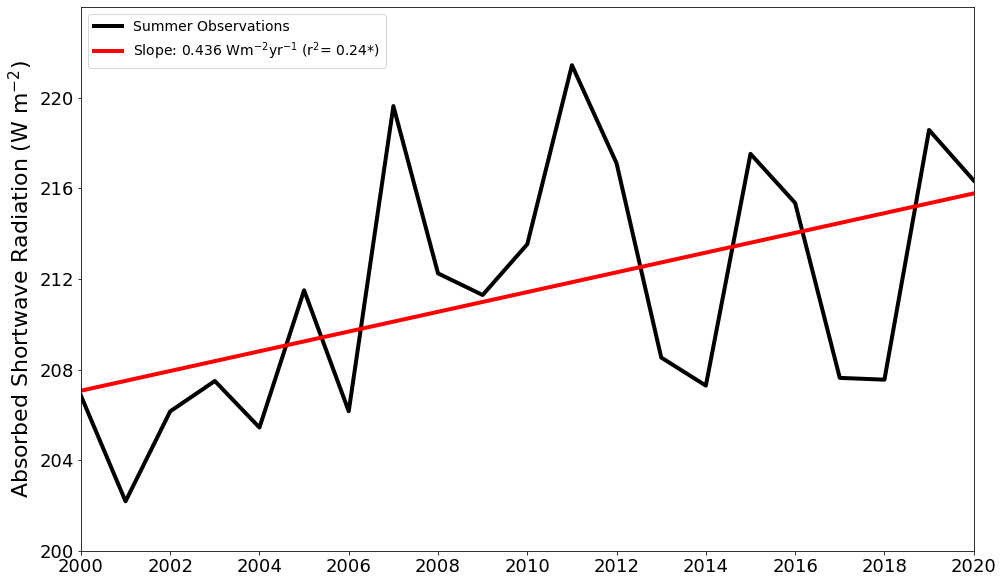

In [36]:
# Step 7: plotting figures and trend lines
#### science plot
#season='Summer ASR'
data=summer_ASR.groupby('time.year').mean('time')
slope=slope_summer_ASR
intercept=intercept_summer_ASR
fig = plt.figure(figsize=(16,10));

## plot CESM2 LE ensemble members
plt.plot(x,data,color="black", linewidth=4, label='Summer Observations');  
plt.plot(x,x*slope+intercept,color="red", linewidth=4, label='Slope: '+str(np.round(slope_summer_ASR,3))+" Wm$^{-2}$yr$^{-1}$"+\
    " (r$^2$= "+ str(np.round(r2Summer_ASR,2))+"*) "); 
         
#plt.plot(x,0+intercept,color="white", linewidth=4, label='r value: '+str(np.round(r2_ASR,3))); 

#plt.ylabel("Absorbed Shortwave Radiation for Summer (W/m\u00b2)", fontsize=22);
plt.ylabel("Absorbed Shortwave Radiation (W m$^{-2}$)", fontsize=22);

plt.ylim([200,224]);
plt.xlim([0,20]);
yticks=np.arange(200,224,4);
xticks=np.arange(0,21,2);
xlab=np.arange(2000,2021,2);
plt.xticks(xticks,xlab,size='18');
plt.yticks(yticks,fontsize=18);
plt.legend(loc='upper left', fontsize=14);


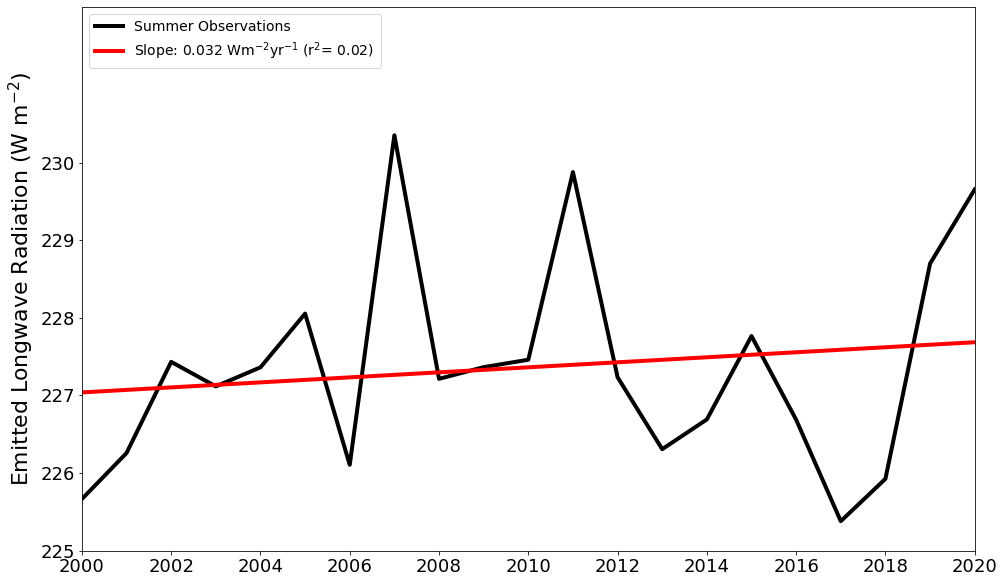

In [41]:
season='Summer OLR'
data=summer_OLR.groupby('time.year').mean('time')
slope=slope_summer_OLR
intercept=intercept_summer_OLR
fig = plt.figure(figsize=(16,10));

## plot CESM2 LE ensemble members
plt.plot(x,data,color="black", linewidth=4, label='Summer Observations');  
plt.plot(x,x*slope+intercept,color="red", linewidth=4, label='Slope: '+str(np.round(slope_summer_OLR,3))+" Wm$^{-2}$yr$^{-1}$"+\
    " (r$^2$= "+ str(np.round(r2Summer_OLR,2))+") "); 
#plt.plot(x,0+intercept,color="white", linewidth=4, label='r value: '+str(np.round(r2_ASR,3))); 

#plt.ylabel("Absorbed Shortwave Radiation for Summer (W/m\u00b2)", fontsize=22);
plt.ylabel("Emitted Longwave Radiation (W m$^{-2}$)", fontsize=22);

plt.ylim([225,232]);
plt.xlim([0,20]);
yticks=np.arange(225,231,1);
xticks=np.arange(0,21,2);
xlab=np.arange(2000,2021,2);
plt.xticks(xticks,xlab,size='18');
plt.yticks(yticks,fontsize=18);
plt.legend(loc='upper left', fontsize=14);

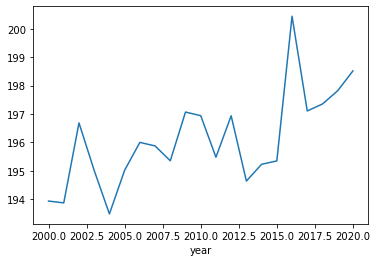

In [14]:
fall_OLR.groupby('time.year').mean('time').plot()

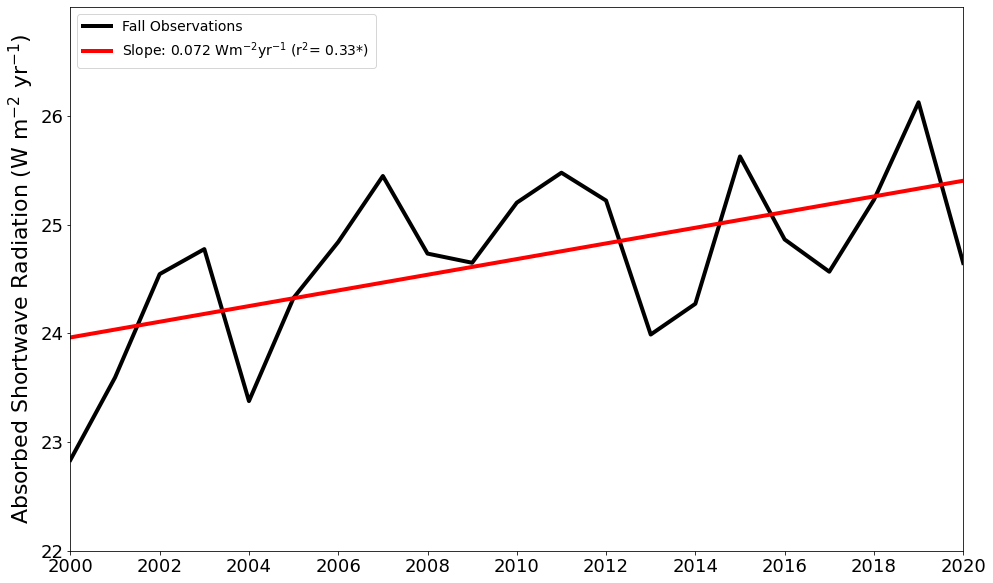

In [48]:
season='Fall ASR'
data=fall_ASR.groupby('time.year').mean('time')
slope=slope_fall_ASR
intercept=intercept_fall_ASR
fig = plt.figure(figsize=(16,10));

## plot CESM2 LE ensemble members
plt.plot(x,data,color="black", linewidth=4, label='Fall Observations');  
plt.plot(x,x*slope+intercept,color="red", linewidth=4, label='Slope: '+str(np.round(slope_fall_ASR,3))+" Wm$^{-2}$yr$^{-1}$"+\
    " (r$^2$= "+ str(np.round(r2Fall_ASR,2))+"*) "); 

#plt.plot(x,0+intercept,color="white", linewidth=4, label='r value: '+str(np.round(r2_ASR,3))); 

#plt.ylabel("Absorbed Shortwave Radiation for Summer (W/m\u00b2)", fontsize=22);
plt.ylabel("Absorbed Shortwave Radiation (W m$^{-2}$ yr$^{-1}$)", fontsize=22);

plt.ylim([22,27]);
plt.xlim([0,20]);
yticks=np.arange(22,27,1);
xticks=np.arange(0,21,2);
xlab=np.arange(2000,2021,2);
plt.xticks(xticks,xlab,size='18');
plt.yticks(yticks,fontsize=18);
plt.legend(loc='upper left', fontsize=14);

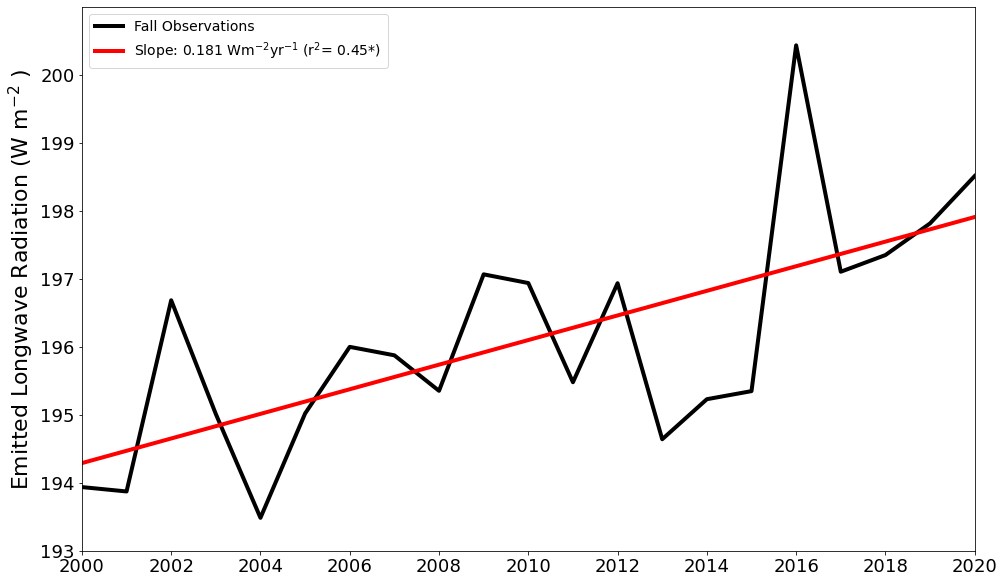

In [47]:
season='Fall OLR'
data=fall_OLR.groupby('time.year').mean('time')
slope=slope_fall_OLR
intercept=intercept_fall_OLR
fig = plt.figure(figsize=(16,10));

## plot CESM2 LE ensemble members
plt.plot(x,data,color="black", linewidth=4, label='Fall Observations');  
plt.plot(x,x*slope+intercept,color="red", linewidth=4, label='Slope: '+str(np.round(slope_fall_OLR,3))+" Wm$^{-2}$yr$^{-1}$"+\
    " (r$^2$= "+ str(np.round(r2Fall_OLR,2))+"*) "); 
#plt.plot(x,0+intercept,color="white", linewidth=4, label='r value: '+str(np.round(r2_ASR,3))); 

#plt.ylabel("Absorbed Shortwave Radiation for Summer (W/m\u00b2)", fontsize=22);
plt.ylabel("Emitted Longwave Radiation (W m$^{-2}$ )", fontsize=22);

plt.ylim([193,201]);
plt.xlim([0,20]);
yticks=np.arange(193,201,1);
xticks=np.arange(0,21,2);
xlab=np.arange(2000,2021,2);
plt.xticks(xticks,xlab,size='18');
plt.yticks(yticks,fontsize=18);
plt.legend(loc='upper left', fontsize=14);